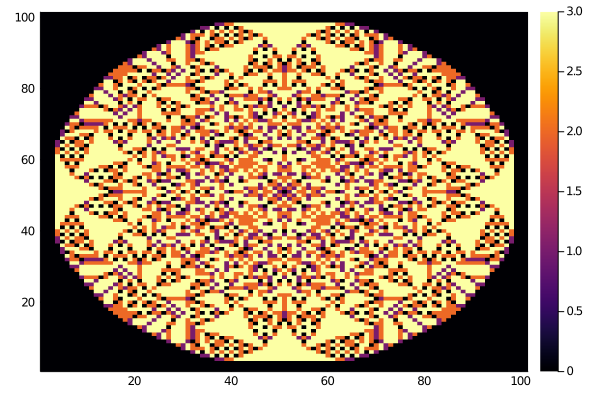

In [14]:
using Plots

WIDTH = 101
HEIGHT = 101

table = zeros(UInt64, WIDTH, HEIGHT)
table[Int(ceil(WIDTH/2)), Int(ceil(HEIGHT/2))] = 2^14

function add_sand(arr, i, j, amount)
    if i > 0 && i <= WIDTH && j > 0 && j <= HEIGHT
        arr[i, j] += amount
    end
    arr
end

hasToppled = true
while hasToppled
    hasToppledThisLoop = false
    buffer = copy(table)
    for i = 1:WIDTH
        for j = 1:HEIGHT
            if table[i, j] > 3
                num_tople = floor(table[i, j] / 4)
                buffer[i, j] -= num_tople * 4
                buffer = add_sand(buffer, i-1, j, num_tople)
                buffer = add_sand(buffer, i+1, j, num_tople)
                buffer = add_sand(buffer, i, j-1, num_tople)
                buffer = add_sand(buffer, i, j+1, num_tople)
                hasToppledThisLoop = true
            end
        end
    end
    table = buffer;
    hasToppled = hasToppledThisLoop
end

display(heatmap(table))